In [1]:
# Open training, testing subsets from https://doi.org/10.1021/acs.energyfuels.0c01533
from csv import DictReader

with open('schweidtmann_train.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    compounds_train = [r for r in reader]
csv_file.close()
with open('schweidtmann_test.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    compounds_test = [r for r in reader]
csv_file.close()

print(len(compounds_train), len(compounds_test))

# Filter out compounds with `n.a.` CN data
compounds_train = [c for c in compounds_train if c['Meas DCN'] != 'n.a.']
compounds_test = [c for c in compounds_test if c['Meas DCN'] != 'n.a.']

# Get SMILES, values
smiles_train = [c[' SMILES'] for c in compounds_train]
targets_train = [[float(c['Meas DCN'])] for c in compounds_train]

smiles_test = [c[' SMILES'] for c in compounds_test]
targets_test = [[float(c['Meas DCN'])] for c in compounds_test]

430 75


In [26]:
from graphchem import CompoundOperator

co = CompoundOperator()
train_loss, valid_loss = co.train(
    smiles_train, targets_train, verbose=25,
    valid_patience=100,
    batch_size=32,
    epochs=1000,
    shuffle=True,
    model_config={
        'n_messages': 3,
        'n_hidden': 3,
        'hidden_dim': 32,
        'dropout': 0.0
    },
    lr=0.005,
    lr_decay=0.0
)

Epoch: 0 | Train Loss: 1139.025362541339 | Valid Loss: 762.3048095703125
Epoch: 25 | Train Loss: 358.8041125338502 | Valid Loss: 498.44720458984375
Epoch: 50 | Train Loss: 322.9066984024516 | Valid Loss: 309.58685302734375
Epoch: 75 | Train Loss: 215.71646838978023 | Valid Loss: 216.05764770507812
Epoch: 100 | Train Loss: 169.01631702820947 | Valid Loss: 198.71568298339844
Epoch: 125 | Train Loss: 291.43344022598734 | Valid Loss: 353.54132080078125
Epoch: 150 | Train Loss: 164.2311745860094 | Valid Loss: 186.7410888671875
Epoch: 175 | Train Loss: 404.63234149020144 | Valid Loss: 607.901611328125
Epoch: 200 | Train Loss: 192.7277105132495 | Valid Loss: 182.82977294921875
Epoch: 225 | Train Loss: 144.8697941785941 | Valid Loss: 155.6756591796875
Epoch: 250 | Train Loss: 170.817342652865 | Valid Loss: 143.39007568359375
Epoch: 275 | Train Loss: 166.54456001702994 | Valid Loss: 191.16746520996094
Epoch: 300 | Train Loss: 283.0219894596404 | Valid Loss: 219.7277069091797
Epoch: 325 | Train 

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

pred_train = co.use(smiles_train)
pred_test = co.use(smiles_test)
print('MAE Train: {}'.format(
    mean_absolute_error(pred_train, targets_train)
))
print('MAE Test: {}'.format(
    mean_absolute_error(pred_test, targets_test)
))
print('R2 Train: {}'.format(
    r2_score(pred_train, targets_train)
))
print('R2 Test: {}'.format(
    r2_score(pred_test, targets_test)
))


MAE Train: 4.581750367669498
MAE Test: 10.148585489392282
R2 Train: 0.8778981950551402
R2 Test: 0.5761348036501597


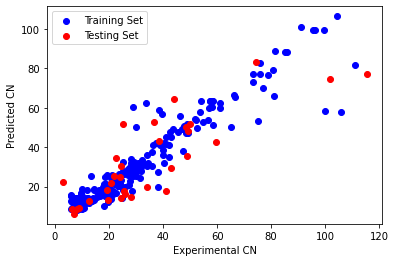

In [28]:
from matplotlib import pyplot as plt

plt.clf()
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
plt.scatter(targets_train, pred_train, color='blue', label='Training Set')
plt.scatter(targets_test, pred_test, color='red', label='Testing Set')
plt.legend(loc='upper left')
plt.show()

In [17]:
co.save_model('model.pt', 'encoder.enc')

In [18]:
co2 = CompoundOperator()
co2.load_model('model.pt', 'encoder.enc')
pred_train = co2.use(smiles_train)
pred_test = co2.use(smiles_test)
print('MAE Train: {}'.format(
    mean_absolute_error(pred_train, targets_train)
))
print('MAE Test: {}'.format(
    mean_absolute_error(pred_test, targets_test)
))
print('R2 Train: {}'.format(
    r2_score(pred_train, targets_train)
))
print('R2 Test: {}'.format(
    r2_score(pred_test, targets_test)
))

MAE Train: 3.799621963500975
MAE Test: 7.0409265518188455
R2 Train: 0.7933634164713622
R2 Test: 0.46688576859379316


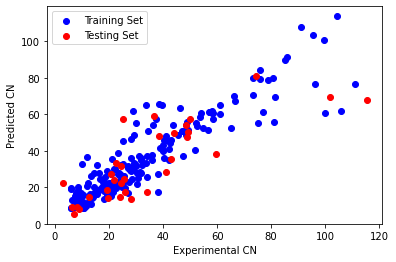

In [19]:
plt.clf()
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
plt.scatter(targets_train, pred_train, color='blue', label='Training Set')
plt.scatter(targets_test, pred_test, color='red', label='Testing Set')
plt.legend(loc='upper left')
plt.show()